## **OpenCV Tutorial - Develop Computer Vision Apps in the Cloud With Python**

Course from https://youtu.be/iXNsAYOTzgM

In [3]:
# imports
import cv2
from matplotlib import pyplot as plt
import numpy as np

files                 opencv-example1.ipynb videos
images                opencv-example2.ipynb


In [4]:
# helpers
def cv2_imshow(image, figsize = (20, 3)):
    display = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = figsize)
    plt.imshow(display, interpolation='nearest')

# **Part 1: Basic Exercises**

## Lesson 1: Changing Image's Color Profile

(476, 640, 3)
(476, 640)
(476, 640, 3)


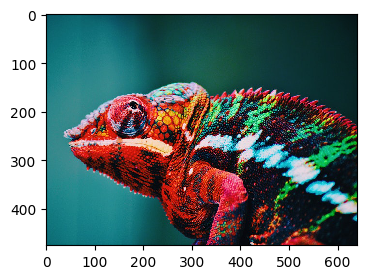

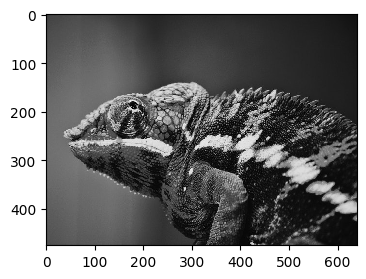

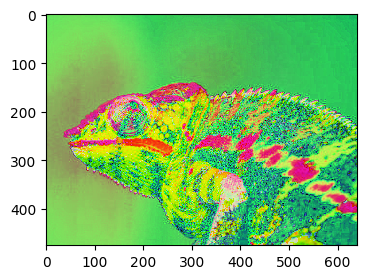

In [5]:
# colorful image
image = cv2.imread("./images/color.jpg")
print(image.shape)
cv2_imshow(image)

# changing to grayscale
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(grayImage.shape)
cv2_imshow(grayImage)

# HSV image
hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
print(hsvImage.shape)
cv2_imshow(hsvImage)

## Lesson 2: Edge Detection

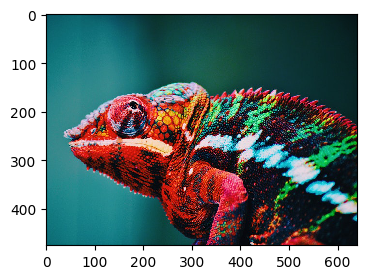

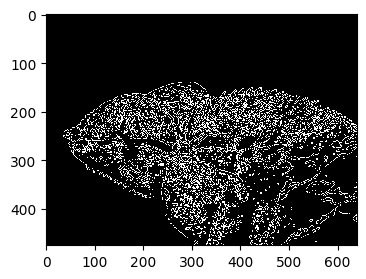

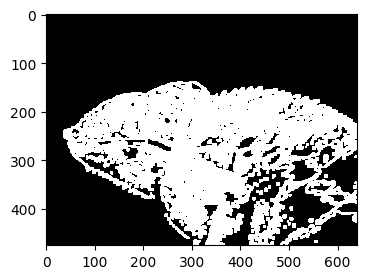

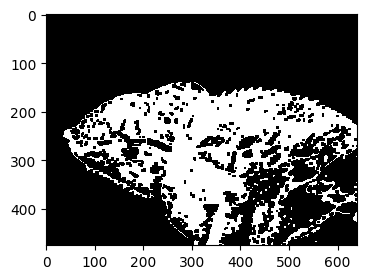

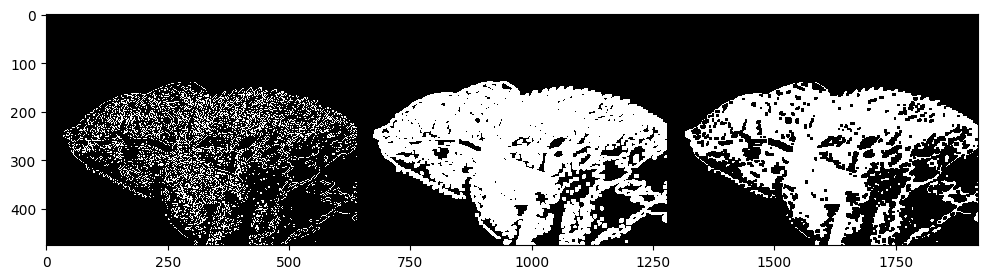

In [6]:
image = cv2.imread("images/color.jpg")
cv2_imshow(image)

grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny_image = cv2.Canny(grayImage, 150, 200)
cv2_imshow(canny_image)

# Erosion and Dilation
# Dilation
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(canny_image, kernel, iterations=1)
cv2_imshow(dilated_image)

# Erosion
# kernel = np.ones((1, 1), np.uint8)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)
cv2_imshow(eroded_image)

display = np.hstack((canny_image, dilated_image, eroded_image))
cv2_imshow(display)

## Lesson 3: Image Manipulation-Noise

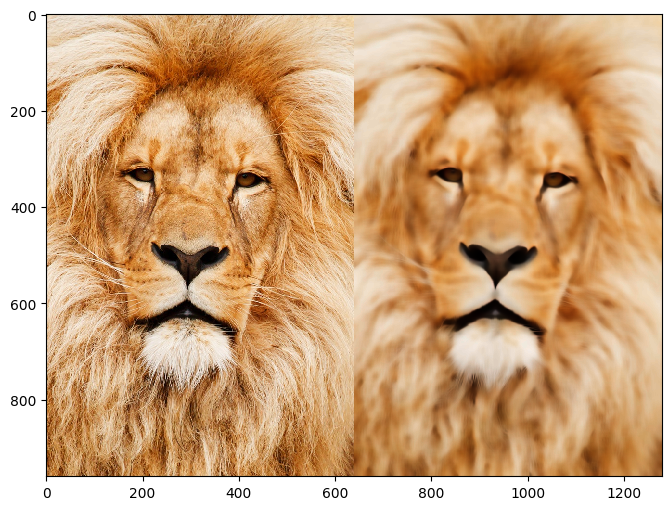

In [7]:
image = cv2.imread("images/lion.jpg")

dst = cv2.fastNlMeansDenoisingColored(image, None, 50, 20, 7, 15)

display = np.hstack((image, dst))
cv2_imshow(display, (25, 6))

## Lesson 4: Drawing Shapes and Writing

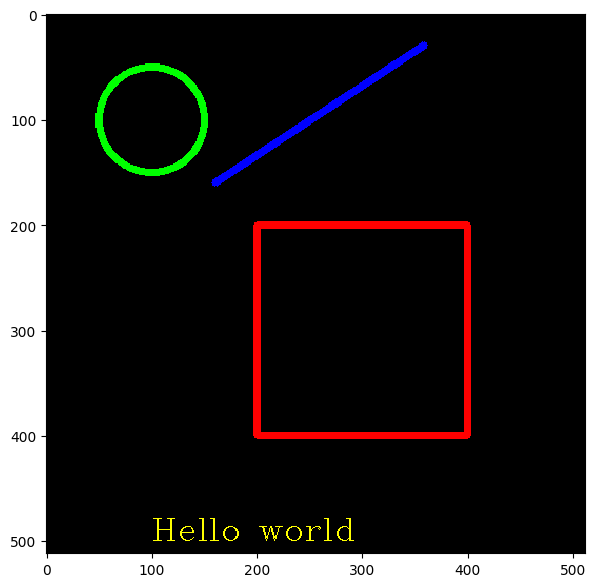

In [8]:
img = np.zeros((512, 512, 3), np.uint8)

# Drawing Functions
cv2.circle(img, (100, 100), 50, (0, 255, 0), 5)
cv2.rectangle(img, (200, 200), (400, 400), (0, 0, 255), 5)
cv2.line(img, (160, 160), (359, 29), (255, 0, 0), 5)
cv2.putText(img, "Hello world", (100, 500), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 255), 1)

cv2_imshow(img, (7, 7))

# **Part 2: Intermediate Exercises**

## Lesson 1: Color Detection

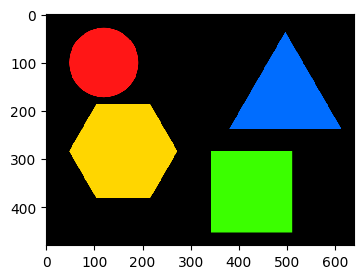

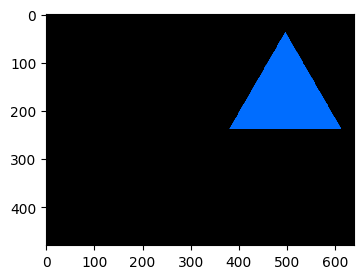

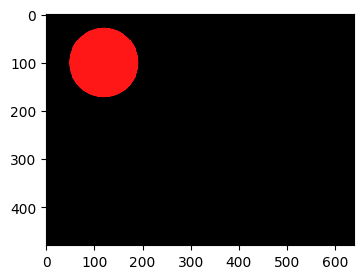

In [9]:
# BGR image
image = cv2.imread("images/shapes.png")

# HSV image
hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# extract blue color area from image
lowerBlue = np.array([65, 0, 0])
upperBlue = np.array([110, 255, 255])
maskTriangle = cv2.inRange(hsvImage, lowerBlue, upperBlue)
resultTriangle = cv2.bitwise_and(image, image, mask=maskTriangle)

# extract read color area from image
lowerRed = np.array([0, 0, 0])
upperRed = np.array([20, 255, 255])
maskCircle = cv2.inRange(hsvImage, lowerRed, upperRed)
resultCircle = cv2.bitwise_and(image, image, mask=maskCircle)

cv2_imshow(image)
cv2_imshow(resultTriangle)
cv2_imshow(resultCircle)


## Lesson 2: Face Detection

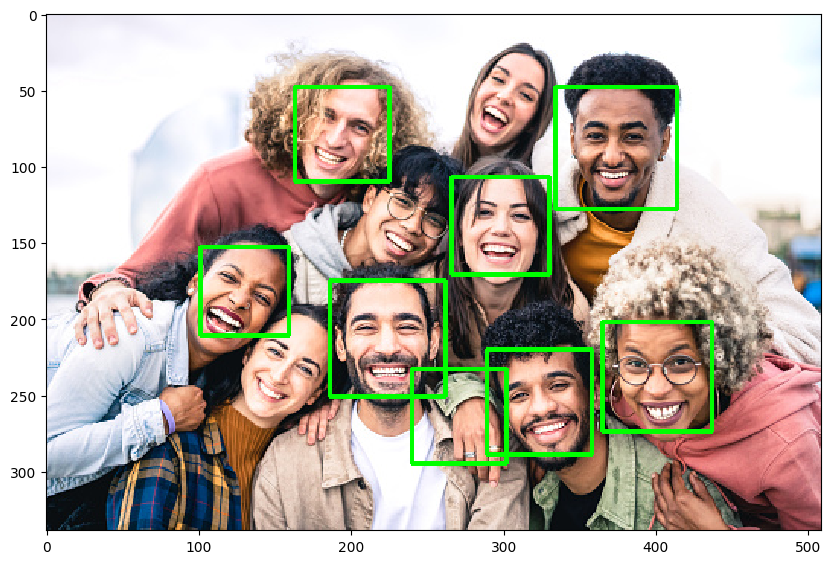

In [11]:
faceCascade = cv2.CascadeClassifier("files/haarcascade_frontalface_default.xml")
image = cv2.imread("images/group1.jpg")
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(grayImage, 1.1, 2)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image, (10, 10))

## Lesson 3: Shape Detection

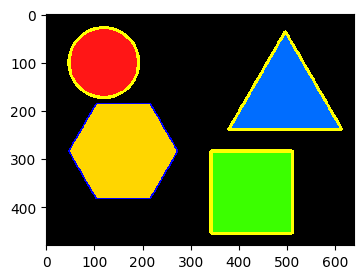

In [13]:
image = cv2.imread("images/shapes.png")
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# filter and threshold into just one color type
ret, thresh = cv2.threshold(grayImage, 50, 255, 1)

# find contours
contours, hierarchy = cv2.findContours(thresh, 1, 2)

for cnt in contours[:-1]: # first is the whole image
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    n = len(approx)
    if n == 4:
        # this is a square
        cv2.drawContours(image, [cnt], 0, (0, 255, 255), 5)
        
    if n == 6:
        # this is a hexagon
        cv2.drawContours(image, [cnt], 0, (255, 0, 0), 2)

    if n > 9:
        # this is a circle
        cv2.drawContours(image, [cnt], 0, (0, 255, 255), 5)
    
    if n == 3:
        # this is a triangle
        cv2.drawContours(image, [cnt], 0, (0, 255, 255), 5)
        

cv2_imshow(image)

## Lesson 4: Track a ball

In [15]:
cap = cv2.VideoCapture("videos/video.mp4")
out = cv2.VideoWriter("videos/output.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, (1920, 1080))

ball = []

while cap.isOpened():
    ret, frame = cap.read()
    if ret == False:
        break
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_hue = np.array([21, 0, 0])
    upper_hue = np.array([45, 255, 255])
    mask = cv2.inRange(hsv, lower_hue, upper_hue)
    
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    center = None
    if len(contours) > 0:
        c = max(contours, key=cv2.contourArea)
        ((x, y), radious) = cv2.minEnclosingCircle(c)
        M = cv2.moments(c)
        try:
            center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
            cv2.circle(frame, center, 10, (255, 0, 0), -1)
            ball.append(center)
        except:
            pass
    
        if len(ball) > 2:
            for i in range(1, len(ball)):
                cv2.line(frame, ball[i - 1], ball[i], (0, 0, 255), 2)
            
    out.write(frame)

out.release()
cap.release()

## Lesson 5: Face Recognition

### Setup

In [19]:
import face_recognition

files                 opencv-example1.ipynb videos
images                opencv-example2.ipynb


### Creating the encoding profiles

In [20]:
def getFaceEncodings(imageFile):
    face = face_recognition.load_image_file(imageFile)
    return face_recognition.face_encodings(face)[0]

elonEnconding = getFaceEncodings("images/faces/elon.jpg")
trumpEnconding = getFaceEncodings("images/faces/donaldTrump.jpg")
bezosEnconding = getFaceEncodings("images/faces/jeffbezos.jpg")
ertugrulEnconding = getFaceEncodings("images/faces/ertugrul.jpeg")

# define the known faces
knownFaceEncodings = [elonEnconding, trumpEnconding, bezosEnconding, ertugrulEnconding]
knownFaceNames = ["Elon Musk", "Donald Trump", "Jeff Bezos", "ertugrul"]


### Run face recognition on unknown faces

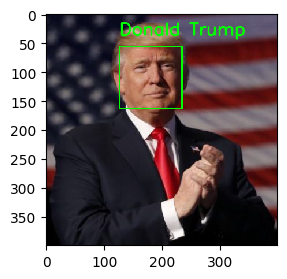

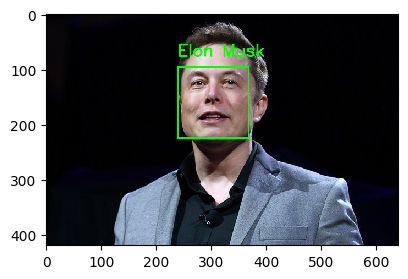

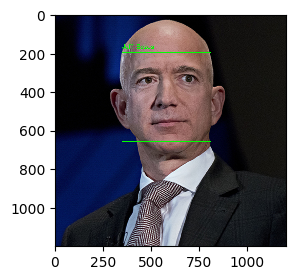

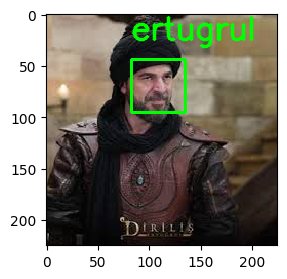

In [25]:
def recognizeFace(imageFile):
    unknownImage = face_recognition.load_image_file(imageFile)
    
    imageDraw = cv2.imread(imageFile)
    
    faceLocations = face_recognition.face_locations(unknownImage)
    faceEncodings = face_recognition.face_encodings(unknownImage, faceLocations)
    
    for (top, right, bottom, left), faceEncoding in zip(faceLocations, faceEncodings):
        matches = face_recognition.compare_faces(knownFaceEncodings, faceEncoding)
        
        name = "Unknown"
        
        faceDistances = face_recognition.face_distance(knownFaceEncodings, faceEncoding)
        bestMatchIndex = np.argmin(faceDistances)
        
        if matches[bestMatchIndex]:
            name = knownFaceNames[bestMatchIndex]
        
        cv2.rectangle(imageDraw, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(imageDraw, name, (left, top - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    cv2_imshow(imageDraw)


recognizeFace("images/faces/unknown_do.jpg")
recognizeFace("images/faces/unknown_el.jpg")
recognizeFace("images/faces/unknown_je.jpg")
recognizeFace("images/faces/unknown_er.jpg")